# Creating csv data file 

In [1]:
import csv

data = [
    ["Day", "[Cu] (25:75)", "[Cu] (50:50)", "[Cu] (75:25)", 
     "PCB (g)", "[Cu] (50:50, PCB)"],
    [1, 42.13, 31.12, 21.50, 2, 20.83],
    [2, 45.10, 37.97, 22.98, 4, 21.16],
    [3, 45.04, 46.23, 26.63, 6, 23.64],
    [4, 47.06, 49.89, 28.21, 8, 19.88],
    [5, 48.43, 52.34, 32.35, 10, 16.82]
]

csv_file = "data.csv"                           # Specify the file name

with open(csv_file, 'w', newline='') as file:   # Write data to CSV file
    writer = csv.writer(file)
    writer.writerows(data)

print("Message: Data saved to", csv_file)


Message: Data saved to data.csv


# Read data using 'pandas'

In [2]:
import pandas as pd

csv_file = "data.csv"        # Load the CSV file
df = pd.read_csv(csv_file)

print(df.head())       # Display the 1st 5 rows

   Day  [Cu] (25:75)  [Cu] (50:50)  [Cu] (75:25)  PCB (g)  [Cu] (50:50, PCB)
0    1         42.13         31.12         21.50        2              20.83
1    2         45.10         37.97         22.98        4              21.16
2    3         45.04         46.23         26.63        6              23.64
3    4         47.06         49.89         28.21        8              19.88
4    5         48.43         52.34         32.35       10              16.82


# ------------------------------------------------------------------------------------------

# Part 1: Optimization for the concentration of leaching reagent

## Step 1 - Extracting data from 'dataframe' 

In [3]:
# Extracting the first four columns and converting to float with 'integer location'
x_iron = df.iloc[:, 0].astype(float)   # Day number 
y_25 = df.iloc[:, 1].astype(float)  # Extraction of Cu in wt% with 25:75 Fe(II):Fe(III) solution 
y_50 = df.iloc[:, 2].astype(float)  # Extraction of Cu in wt% with 50:50 Fe(II):Fe(III) solution 
y_75 = df.iloc[:, 3].astype(float)  # Extraction of Cu in wt% with 75:25 Fe(II):Fe(III) solution 

# Printing the first few values of each variable
# print("x_iron (days):\n", x.head(), '\n')
# print("y_25 (Cu in wt% (25:75)):\n", y_25.head(), '\n')
# print("y_50 (Cu in wt% (50:50):\n", y_50.head(), '\n')
# print("y_75 (Cu in wt% (75:25):\n", y_75.head(), '\n')

## Step 2 - Plotting the experimental data using 'matplotlib'

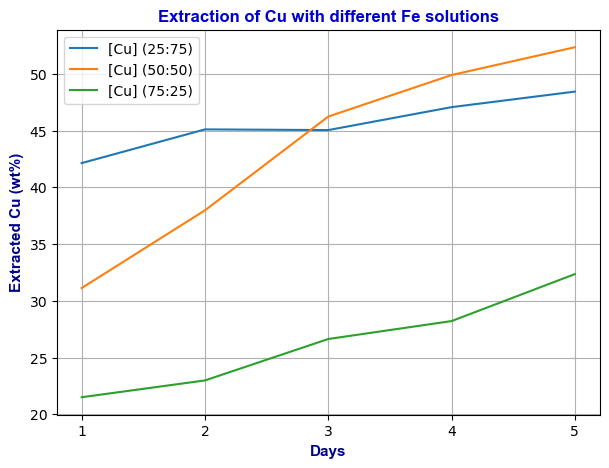

In [4]:
import matplotlib.pyplot as plt

# Extracting the first four columns and converting to float by 'column names'
# x_iron = df['Day'].astype(float)
# y_25 = df['[Cu] (25:75)'].astype(float)
# y_50 = df['[Cu] (50:50)'].astype(float)
# y_75 = df['[Cu] (75:25)'].astype(float)

# Plotting
plt.figure(figsize=(7,5), dpi=100)

plt.plot(x_iron, y_25, label='[Cu] (25:75)')
plt.plot(x_iron, y_50, label='[Cu] (50:50)')
plt.plot(x_iron, y_75, label='[Cu] (75:25)')

# Adding labels and title

font_dict_title = {
    'family': 'Arial',
    'size': 12,
    'weight': 'bold',
    'style': 'normal',
    'variant': 'normal',
    'stretch': 'normal',
    'color': 'mediumblue',
    'alpha': 1.0  # Fully opaque
}

font_dict_label = {
    'family': 'Arial',
    'size': 11,
    'weight': 'bold',
    'style': 'normal',
    'variant': 'normal',
    'stretch': 'normal',
    'color': 'darkblue',
    'alpha': 1.0  # Fully opaque
}

plt.xlabel('Days', fontdict=font_dict_label)
plt.ylabel('Extracted Cu (wt%)', fontdict=font_dict_label)
plt.title('Extraction of Cu with different Fe solutions', 
          fontdict=font_dict_title)

plt.legend(loc=2)
plt.grid()
plt.xticks([1,2,3,4,5])

plt.show()

## Step 3 - Finding the best leaching solution

In [5]:
# Deduction
print("Finding of Part-1: \n '(50:50) volume% Fe solution' gives maximum Cu extraction," 
      " ", "52.34 wt%, in the 5-day extraction process.")

Finding of Part-1: 
 '(50:50) volume% Fe solution' gives maximum Cu extraction,  52.34 wt%, in the 5-day extraction process.


# ------------------------------------------------------------------------------------------

# Part - 2: Calculation of Reaction Order for the reaction with the optimum leaching solution

## Step 1: Extracting data from 'dataframe' and plotting

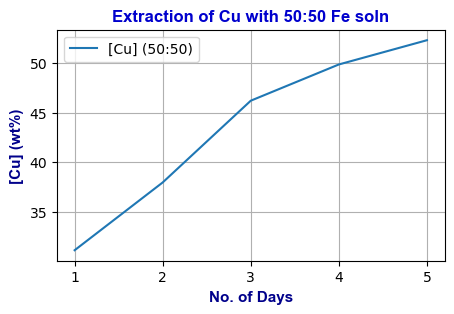

In [6]:
# Extracting data for time and concentration of Cu with 50:50 Fe solution
time = df['Day'].astype(float)            # time for reaction
C_A = df['[Cu] (50:50)'].astype(float)    # conc. of Cu leached by 50:50 Fe soln

x=time
y=C_A

# Plotting
plt.figure(figsize=(5,3), dpi=100)
plt.plot(x, y, label='[Cu] (50:50)')

plt.xlabel('No. of Days', fontdict=font_dict_label)
plt.ylabel('[Cu] (wt%)', fontdict=font_dict_label)
plt.title('Extraction of Cu with 50:50 Fe soln', fontdict=font_dict_title)

plt.legend()
plt.grid()
plt.xticks(x)

# Show plot
plt.show()


## Step 2: Interpolation for [Cu] vs time data with 
    # piecewise cubic Hermite interpolating polynomial (pchip) interpolation function

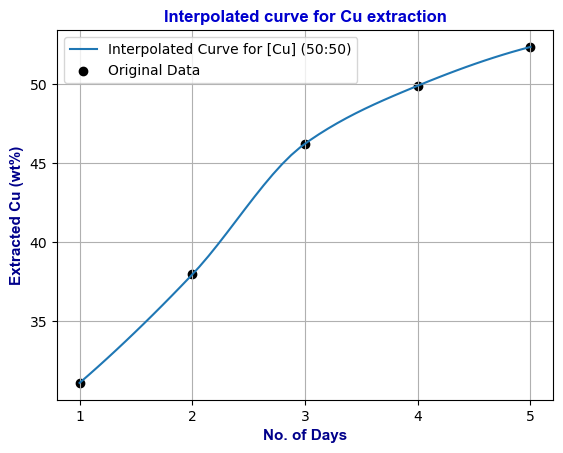

In [7]:
import numpy as np
from scipy.interpolate import PchipInterpolator

pchip_func = PchipInterpolator(x, y)                  # Define a function
x_pchip = np.linspace(x.min(), x.max(), 50)           # print('Interpolated x:\n', x_pchip)
y_pchip = pchip_func(x_pchip)                         # Interpolation for [Cu]
# print('Interpolated y_pchip (50:50):\n', y_pchip)   # printing interpolated [Cu]

# Plotting 
plt.plot(x_pchip, y_pchip, label='Interpolated Curve for [Cu] (50:50)')   # interpolated data
plt.scatter(x, y, color='black', label='Original Data')                   # original data
            
plt.xlabel('No. of Days', fontdict=font_dict_label)
plt.ylabel('Extracted Cu (wt%)', fontdict=font_dict_label)
plt.title('Interpolated curve for Cu extraction', fontdict=font_dict_title)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

# Show plot
plt.show()


## Step 3: Calculation for different reaction order

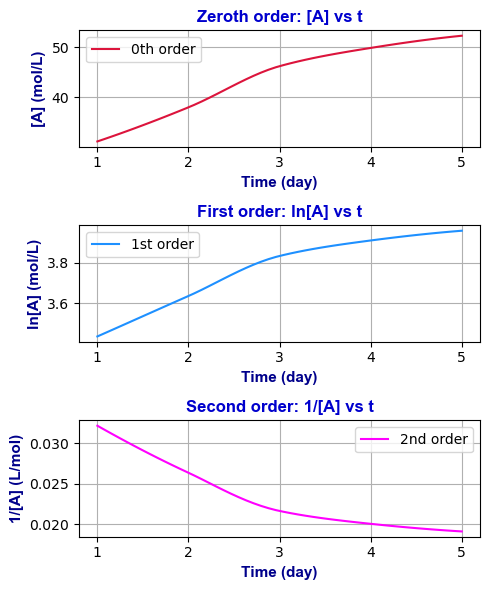

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Calculating y-data for different reaction orders
y0=y_pchip
y1=np.log(y_pchip)
y2=[1.0/i for i in y_pchip]

# Plotting in a subplot
fig, axs = plt.subplots(3,1, figsize=(5, 6), tight_layout=True)

  # (1) Plot for zeroth order, [A] vs t
plt.subplot(3,1,1)
plt.plot(x_pchip,y0, label='0th order', color = 'crimson')

plt.title('Zeroth order: [A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('[A] (mol/L)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

  # (2) Plot for first order, ln[A] vs t
plt.subplot(3,1,2)
plt.plot(x_pchip,y1, label='1st order', color = 'dodgerblue')

plt.title('First order: ln[A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('ln[A] (mol/L)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

  # (3) Plot for second order, ln[A] vs t
plt.subplot(3,1,3)
plt.plot(x_pchip,y2, label='2nd order', color = 'fuchsia')

plt.title('Second order: 1/[A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('1/[A] (L/mol)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

# Show the plot
plt.show()


## Step 4: Curve fitting for reaction order

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [10]:
# Zeroth order
def linear_function0(x, m0, c0):
    return m0 * x + c0

params0, _ = curve_fit(linear_function0, x_pchip, y0)   # Fitting the curve
m0, c0 = params0                                        # Extracting fitted parameters
y0_fitted = linear_function0(x_pchip, m0, c0)           # Calculating fitted y
r_squared0 = r2_score(y0, y0_fitted)                    # Calculating R-square value

# First order
def linear_function1(x, m1, c1):
    return m1 * x + c1

params1, _ = curve_fit(linear_function1, x_pchip, y1)
m1, c1 = params1
y1_fitted = linear_function1(x_pchip, m1, c1)
r_squared1 = r2_score(y1, y1_fitted)

# Second order
def linear_function2(x, m2, c2):
    return m2 * x + c2

params2, _ = curve_fit(linear_function2, x_pchip, y2)
m2, c2 = params2
y2_fitted = linear_function2(x_pchip, m2, c2)
r_squared2 = r2_score(y2, y2_fitted)

print("R^2 value0:", r_squared0)
print("R^2 value1:", r_squared1)
print("R^2 value2:", r_squared2)


R^2 value0: 0.9535912418174043
R^2 value1: 0.9299916079027138
R^2 value2: 0.9005003307710832


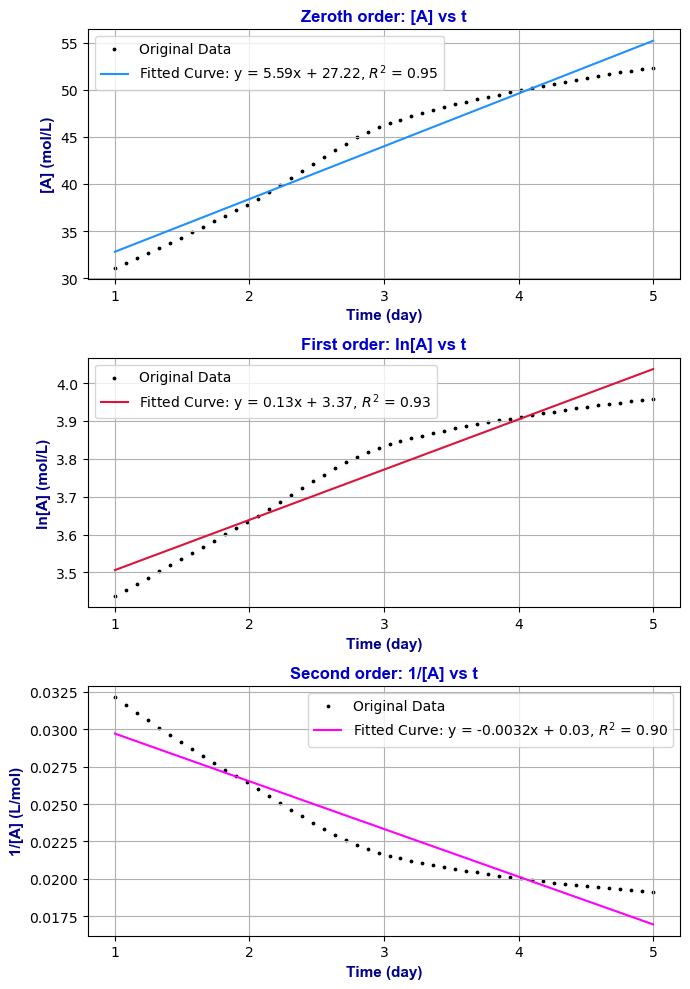

In [11]:
# Plotting fitted data in a subplot
fig, axs = plt.subplots(3,1, figsize=(7, 10), tight_layout=True)

# (1) Plot for zeroth order, [A] vs t
plt.subplot(3,1,1)                                                     # Define the location
plt.scatter(x_pchip, y0, label='Original Data', s=3, color='black')    # original data
plt.plot(x_pchip, y0_fitted, color='dodgerblue',                       # fitted data
         label='Fitted Curve: y = {:.2f}x + {:.2f}, $R^2$ = {:.2f}'
         .format(m0, c0, r_squared0))

plt.title('Zeroth order: [A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('[A] (mol/L)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 


# (2) Plot for first order, ln[A] vs t
plt.subplot(3,1,2)
plt.scatter(x_pchip, y1, label='Original Data', s=3, color='black')
plt.plot(x_pchip, y1_fitted, color='crimson', 
         label='Fitted Curve: y = {:.2f}x + {:.2f}, $R^2$ = {:.2f}'
         .format(m1, c1, r_squared1))

plt.title('First order: ln[A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('ln[A] (mol/L)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

# (3) Plot for second order, ln[A] vs t
plt.subplot(3,1,3)
plt.scatter(x_pchip, y2, label='Original Data', s=3, color='black')
plt.plot(x_pchip, y2_fitted, color='fuchsia', 
         label='Fitted Curve: y = {:.4f}x + {:.2f}, $R^2$ = {:.2f}'
         .format(m2, c2, r_squared2))

plt.title('Second order: 1/[A] vs t', fontdict=font_dict_title)
plt.xlabel('Time (day)', fontdict=font_dict_label)
plt.ylabel('1/[A] (L/mol)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks([1, 2, 3, 4, 5]) 

plt.show()

# ------------------------------------------------------------------------------------------

# Part 3: - Maximizing e-waste amount as feed for the leaching process

## Step 1: Extracting and plotting data 

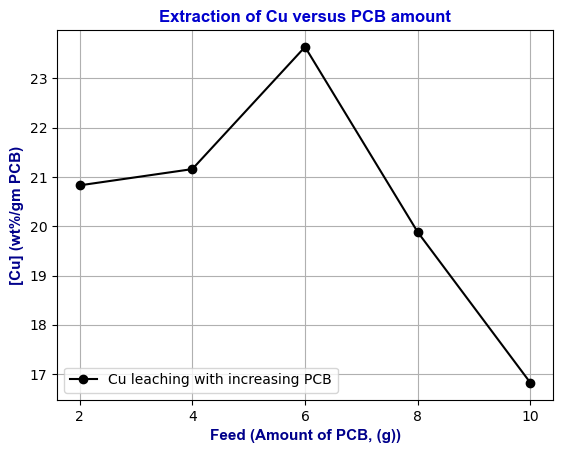

In [12]:
# Extracting data 
x_pcb = df['PCB (g)'].astype(float)             # Feed amount
y_pcb = df['[Cu] (50:50, PCB)'].astype(float)   # [Cu] with 50:50 Fe soln

# Plotting
plt.plot(x_pcb, y_pcb, 'o-', markersize=6, color = 'black',
         label='Cu leaching with increasing PCB')

plt.title('Extraction of Cu versus PCB amount', fontdict=font_dict_title)
plt.xlabel('Feed (Amount of PCB, (g))', fontdict=font_dict_label)
plt.ylabel('[Cu] (wt%/gm PCB)', fontdict=font_dict_label)

plt.legend()
plt.grid()
plt.xticks(x_pcb) 

plt.show()


## Step 2: Interpolation for a smooth curve with 'pchip' function

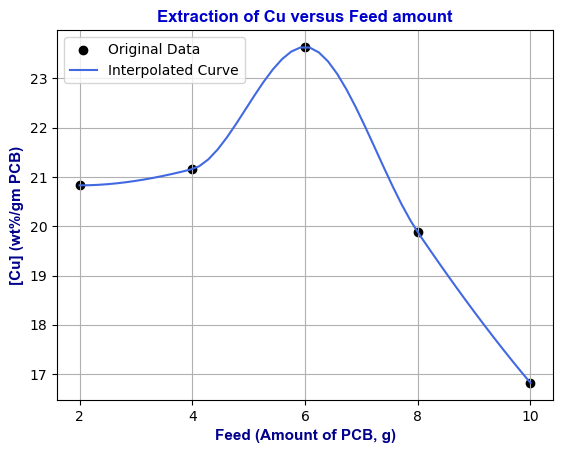

In [13]:
import numpy as np
from scipy.interpolate import PchipInterpolator

x_values = x_pcb.values   # extracting values from pandas series
y_values = y_pcb.values   

pchip_interpolator = PchipInterpolator(x_values, y_values)       # Create a function
x_pcb_pchip =  np.linspace(x_values.min(), x_values.max(), 50)   # Calculate interpolated x
y_pcb_pchip = pchip_interpolator(x_pcb_pchip)                    # Calculate interpolated y 

# Plotting 
plt.scatter(x_pcb, y_pcb, color='black',label='Original Data')     # Original data
plt.plot(x_pcb_pchip, y_pcb_pchip,  color = 'royalblue',           # Interpolated curve
         label='Interpolated Curve')

plt.title('Extraction of Cu versus Feed amount', fontdict=font_dict_title)
plt.xlabel('Feed (Amount of PCB, g)', fontdict=font_dict_label)
plt.ylabel('[Cu] (wt%/gm PCB)', fontdict=font_dict_label)

plt.legend(loc=2)
plt.grid()
plt.xticks(x_pcb) 

plt.show()

## Step 3: Maximization of feed

###   Application of 'minimize' function 

In [83]:
# print('x_pcb_pchip:\n', x_pcb_pchip)
# print('y_pcb_pchip:\n', y_pcb_pchip)

In [14]:
from scipy.optimize import minimize

x_range = x_pcb_pchip
y_range = y_pcb_pchip

def max_pcb(x):
    y_min = np.interp(x, x_range, y_range)  # Calculate y at x 
    return -(y_min)                         # return the -ve minima 

initial_guess = 5.0                         # Initial guess for x_pcb_pchip
result = minimize(max_pcb, initial_guess)   # Perform minimization

x_optimal = result.x[0]                     # Extract x having maximum y
y_optimal = np.interp(x_optimal,            # Extract maximum y 
                      x_pcb_pchip, y_pcb_pchip)

print("Optimal value of PCB for maximum [Cu]: {:.4f}"
      .format(x_optimal), 'gm')
print('Maximum [Cu]: {:.4f}'.format(y_optimal), '(wt%)')


Optimal value of PCB for maximum [Cu]: 5.9184 gm
Maximum [Cu]: 23.6289 (wt%)


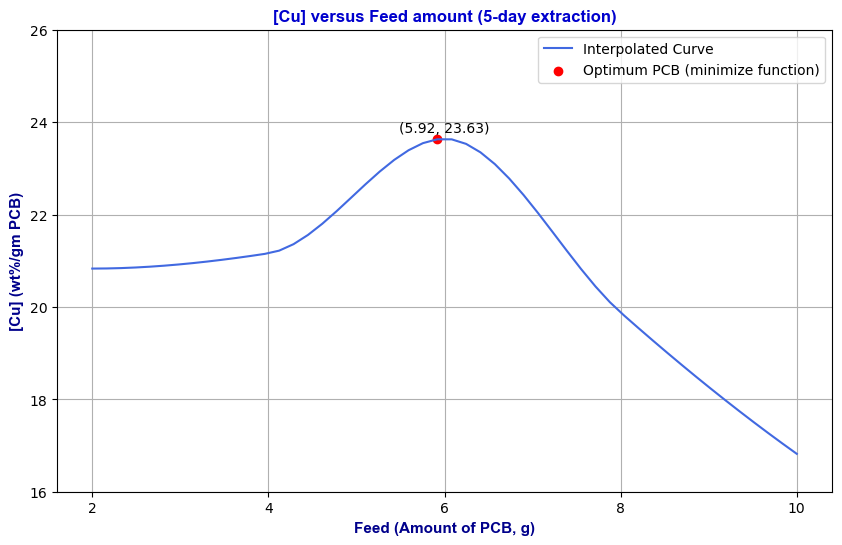

In [15]:
# plotting with data label
plt.figure(figsize=(10,6),dpi=100)

plt.plot(x_pcb_pchip, y_pcb_pchip,  color = 'royalblue',           # Interpolated curve
         label='Interpolated Curve')
plt.scatter(x_optimal, y_optimal, color='red',
            label='Optimum PCB (minimize function)')               # Original data

plt.annotate(f'({x_optimal:.2f}, {y_optimal:.2f})', 
             (x_optimal, y_optimal), textcoords="offset points", 
             xytext=(5,5), ha='center')                            # Data labeling 

plt.title('[Cu] versus Feed amount (5-day extraction)', 
          fontdict=font_dict_title)
plt.xlabel('Feed (Amount of PCB, g)', fontdict=font_dict_label)
plt.ylabel('[Cu] (wt%/gm PCB)', fontdict=font_dict_label)

plt.legend(loc=1)
plt.grid()
plt.xticks(x_pcb) 
plt.yticks([16,18,20,22,24,26]) 

plt.show()


In [16]:
print("Thank You!")

Thank You!
